# Exercise 02: Classifier Comparison

In this exercise, you'll run several classifiers on the same data and compare their effectiveness.

## Installing Modules

In [1]:
import sys
!{sys.executable} -m pip install -U pip
!{sys.executable} -m pip install -U scikit-learn matplotlib seaborn pandas

## Setup

Load the pre-canned wine dataset:

In [2]:
from sklearn import datasets
dataset = datasets.load_wine()

Split test data into training/testing sets:

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    dataset['data'], dataset['target'], test_size=0.4, random_state=40
)

## K Nearest Neighbors

Spend a little time learning about K Nearest Neighbor (KNN) classifiers.

Once you have a handle on how they work, run the code below and inspect the results.

Classification report for classifier KNeighborsClassifier(n_neighbors=3):
              precision    recall  f1-score   support

           0       0.81      0.91      0.86        23
           1       0.69      0.67      0.68        30
           2       0.53      0.47      0.50        19

    accuracy                           0.69        72
   macro avg       0.68      0.68      0.68        72
weighted avg       0.69      0.69      0.69        72


Confusion matrix:
[[21  1  1]
 [ 3 20  7]
 [ 2  8  9]]


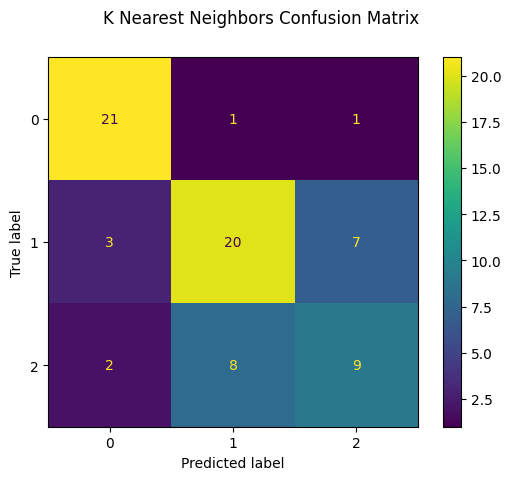

In [4]:
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

clf = KNeighborsClassifier(3)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
print(f"Confusion matrix:\n{disp.confusion_matrix}")
disp.figure_.suptitle("K Nearest Neighbors Confusion Matrix")
plt.show()

## Support Vector Machines

Spend a little time learning about support vector machine (SVM) classifiers.

I've copied the KNN code from above to get you started...modify it to run a support vector machine classifier, and inspect the results.

Classification report for classifier SVC():
              precision    recall  f1-score   support

           0       0.95      0.87      0.91        23
           1       0.68      0.70      0.69        30
           2       0.40      0.42      0.41        19

    accuracy                           0.68        72
   macro avg       0.68      0.66      0.67        72
weighted avg       0.69      0.68      0.69        72


Confusion matrix:
[[20  0  3]
 [ 0 21  9]
 [ 1 10  8]]


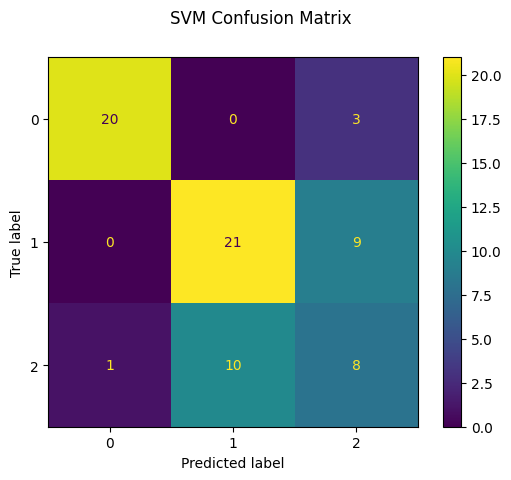

In [5]:
##
## UPDATE THIS CODE
##

import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn import metrics

clf = SVC()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
print(f"Confusion matrix:\n{disp.confusion_matrix}")
disp.figure_.suptitle("SVM Confusion Matrix")
plt.show()

## Decision Trees

Spend a little time learning about decision tree classifiers.

I've copied the KNN code from above to get you started...modify it to run a decision tree classifier, and inspect the results.

Classification report for classifier DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        23
           1       0.90      0.93      0.92        30
           2       1.00      0.95      0.97        19

    accuracy                           0.93        72
   macro avg       0.94      0.93      0.93        72
weighted avg       0.93      0.93      0.93        72


Confusion matrix:
[[21  2  0]
 [ 2 28  0]
 [ 0  1 18]]


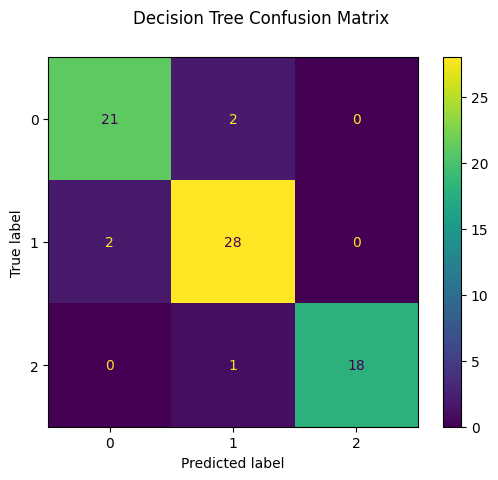

In [6]:
##
## UPDATE THIS CODE
##

import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
print(f"Confusion matrix:\n{disp.confusion_matrix}")
disp.figure_.suptitle("Decision Tree Confusion Matrix")
plt.show()

## Random Forest Classifiers

Spend a little time learning about random forest classifiers.

I've copied the KNN code from above to get you started...modify it to run a random forest classifier, and inspect the results.

Classification report for classifier RandomForestClassifier(n_estimators=10):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        19

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72


Confusion matrix:
[[23  0  0]
 [ 0 30  0]
 [ 0  0 19]]


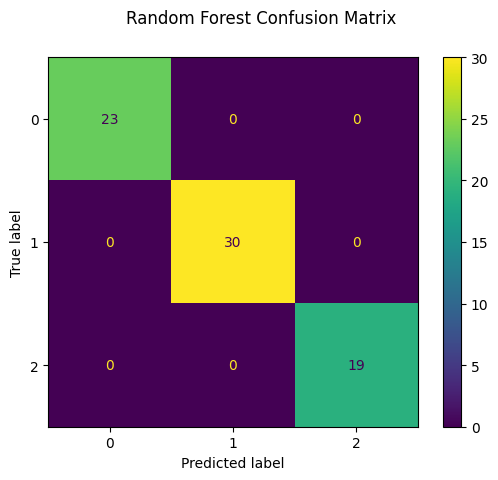

In [7]:
##
## UPDATE THIS CODE
##

import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
print(f"Confusion matrix:\n{disp.confusion_matrix}")
disp.figure_.suptitle("Random Forest Confusion Matrix")
plt.show()

## Questions

Compare and contrast the performance of the classifiers. Which do you think is best, and which worst? Are there any patterns? Anything else interesting to report?

KNN is the worst, and Random Forest is the best. There aren't really any consistent patterns across the board. Some classes do better using some classifiers than others - for example, class 0 has the best F-1 score when using KNN, SVC, and Random Forest, but is tied for 2nd place with class 1 when using Decision Tree.

Was there a pattern to the changes you needed to make?  What does that say about the design of the `scikit-learn` estimators and APIs?

The only changes that needed to be made were the classifier being imported and updating the clf variable to that classifier. I think that this says that scikit-learn estimators and APIs have a lot happening under the hood to allow for such portability. 

## Follow-up

Go back to the train/test split step, and change the `random_state` value.  Rerun the classifiers and inspect the results.  Do this several times for several `random_state` values.  What do you observe?

Different values for random_state produce different outputs for the classifiers.

What does this imply about the training process?

The results are created using some randomness. 

What is `random_state` doing?

It is a seed for the data, so it is shuffling the training and test data. 

What should you do to ensure your ML results are reproducible?

T

**MAKE SURE YOU SAVE, COMMIT, AND PUSH YOUR NOTEBOOKS TO YOUR REPO!!**